My goal is to analyze stats from the 2021 NBA season and break players down into clusters based on their performance in different categories. The purpose is that in a fantasy draft, you may not get the player you want but using this tool you will be able to replace that player with a similar one.

In [390]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [391]:
pd.set_option("display.max_rows", None)

In [392]:
data = pd.read_csv("Data/nbastats.csv" , encoding = 'unicode_escape')
data['FTM'] = round(data['FT%'] * data['FTA'], 0)
data['2PM'] = round(data['2P%'] * data['2PA'], 0)
data['3PM'] = round(data['3P%'] * data['3PA'], 0)
data['FGA'] = data['2PA'] + data['3PA']
data['FGM'] = data['2PM'] + data['3PM']
data['FG%'] = round((data['2PM'] + data['3PM'])/(data['2PA'] + data['3PA']),2)
data['3PMPG'] = round(data['3PM'] / data['GP'],2)
data

,FULL_NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,FT%,2PA,2P%,3PA,3P%,"eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA","TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.",PPG,RPG,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APG,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPG,BPG,TOPG,"VIVersatility IndexVersatility index is a metric that measures a players ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.,FTM,2PM,3PM,FGA,FGM,FG%,3PMPG
0,Precious Achiuwa,Mia,F,21.66,61,12.1,25.2,19.5,13.5,110,0.509,227,0.546,1,0.000,0.544,0.550,5.0,3.4,16.1,0.5,6.1,0.33,0.46,0.70,6.7,106.8,99.7,56.0,124.0,0.0,228,124.0,0.54,0.00
1,Jaylen Adams,Mil,G,25.03,7,2.6,5.4,18.5,0.0,0,0.000,6,0.167,2,0.000,0.125,0.125,0.3,0.4,8.7,0.3,12.6,0.00,0.00,0.00,5.1,NaN,NaN,0.0,1.0,0.0,8,1.0,0.12,0.00
2,Steven Adams,Nor,C,27.83,58,27.7,57.6,11.7,17.7,135,0.444,305,0.620,3,0.000,0.614,0.596,7.6,8.9,17.4,1.9,9.1,0.93,0.66,1.36,7.3,119.7,107.8,60.0,189.0,0.0,308,189.0,0.61,0.00
3,Bam Adebayo,Mia,C-F,23.83,64,33.5,69.7,23.7,15.0,354,0.799,792,0.573,8,0.250,0.571,0.626,18.7,9.0,15.3,5.4,26.9,1.17,1.03,2.64,11.6,121.7,105.0,283.0,454.0,2.0,800,456.0,0.57,0.03
4,LaMarcus Aldridge,San,C-F,35.83,21,25.9,54.0,22.7,7.0,37,0.838,173,0.509,75,0.360,0.518,0.545,13.7,4.5,9.2,1.7,10.2,0.38,0.86,0.95,7.3,107.3,110.0,31.0,88.0,27.0,248,115.0,0.46,1.29
5,LaMarcus Aldridge,Bro,C-F,35.83,5,26.0,54.3,19.9,11.8,10,1.000,43,0.488,5,0.800,0.563,0.611,12.8,4.8,10.2,2.6,14.3,0.60,2.20,1.40,8.3,116.4,107.4,10.0,21.0,4.0,48,25.0,0.52,0.80
6,Ty-Shon Alexander,Pho,G,22.84,15,3.2,6.6,14.9,18.9,2,0.500,3,0.333,9,0.222,0.333,0.349,0.6,0.7,11.9,0.4,15.2,0.00,0.07,0.20,6.9,NaN,NaN,1.0,1.0,2.0,12,3.0,0.25,0.13
7,Nickeil Alexander-Walker,Nor,G,22.70,46,21.9,45.6,23.2,12.4,66,0.727,239,0.485,219,0.347,0.502,0.522,11.0,3.1,7.8,2.2,14.7,1.02,0.48,1.50,7.7,100.5,106.5,48.0,116.0,76.0,458,192.0,0.42,1.65
8,Grayson Allen,Mem,G,25.61,50,25.2,52.5,16.8,9.6,91,0.868,140,0.471,274,0.391,0.547,0.586,10.6,3.2,6.7,2.2,11.5,0.92,0.16,0.96,6.7,115.3,109.9,79.0,66.0,107.0,414,173.0,0.42,2.14
9,Jarrett Allen,Bro,C,23.07,12,26.6,55.5,15.5,19.3,61,0.754,65,0.677,0,0.000,0.677,0.730,11.2,10.4,21.6,1.7,8.3,0.58,1.58,1.83,8.8,134.4,106.6,46.0,44.0,0.0,65,44.0,0.68,0.00


In [393]:
fant_data = data[['FULL_NAME','FT%','FG%','3PMPG','PPG','RPG','APG','SPG','BPG','TOPG']]
fant_data.fillna(0, inplace = True)
fant_data.isna().any()
#fant_data.sort_values('APG')

C:\Users\610892\Anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


FULL_NAME    False
FT%          False
FG%          False
3PMPG        False
PPG          False
RPG          False
APG          False
SPG          False
BPG          False
TOPG         False
dtype: bool

<AxesSubplot:>

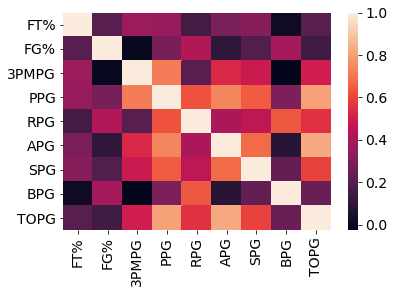

In [394]:
heatmap_data = fant_data.drop('FULL_NAME',axis=1)
sns.heatmap(heatmap_data.corr())

In [395]:
#Perform Clustering
X = heatmap_data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)
km.labels_
fant_data['cluster'] = km.labels_
fant_data.sort_values('cluster')
fant_data.value_counts('cluster')
fant_data

<ipython-input-395-3e4f2d407363>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fant_data['cluster'] = km.labels_


,FULL_NAME,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster
0,Precious Achiuwa,0.509,0.54,0.00,5.0,3.4,0.5,0.33,0.46,0.70,1
1,Jaylen Adams,0.000,0.12,0.00,0.3,0.4,0.3,0.00,0.00,0.00,1
2,Steven Adams,0.444,0.61,0.00,7.6,8.9,1.9,0.93,0.66,1.36,2
3,Bam Adebayo,0.799,0.57,0.03,18.7,9.0,5.4,1.17,1.03,2.64,0
4,LaMarcus Aldridge,0.838,0.46,1.29,13.7,4.5,1.7,0.38,0.86,0.95,2
5,LaMarcus Aldridge,1.000,0.52,0.80,12.8,4.8,2.6,0.60,2.20,1.40,2
6,Ty-Shon Alexander,0.500,0.25,0.13,0.6,0.7,0.4,0.00,0.07,0.20,1
7,Nickeil Alexander-Walker,0.727,0.42,1.65,11.0,3.1,2.2,1.02,0.48,1.50,2
8,Grayson Allen,0.868,0.42,2.14,10.6,3.2,2.2,0.92,0.16,0.96,2
9,Jarrett Allen,0.754,0.68,0.00,11.2,10.4,1.7,0.58,1.58,1.83,2


From simply clustering in 3 groups, I see some trends emerge. On first glance, it accurately predicts a player's position with the cluster group between center, forward, and guard. I will now add back in the position tag and see how well it matches.

In [396]:
fant_data_pos = data[['FULL_NAME','POS','FT%','FG%','3PMPG','PPG','RPG','APG','SPG','BPG','TOPG']]
fant_data_pos.fillna(0, inplace = True)
hmd_pre = fant_data_pos.drop('FULL_NAME',axis=1)
hmd = hmd_pre.drop('POS',axis=1)
X_2 = hmd
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_2)
km.labels_
fant_data_pos['cluster'] = km.labels_
fant_data_pos.sort_values('cluster')
km.cluster_centers_
centers = fant_data_pos.groupby('cluster').mean()
centers.sort_values('PPG')
#fant_data_pos.value_counts('cluster')

C:\Users\610892\Anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-396-c9e294aa8099>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fant_data_pos['cluster'] = km.labels_


,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG
cluster,,,,,,,,,
1,0.653333,0.409736,0.439406,3.743234,2.085809,0.906271,0.370660,0.269868,0.558515
2,0.761301,0.470209,1.230795,10.576151,4.636820,2.222176,0.754895,0.547113,1.238285
0,0.824095,0.474167,2.158571,21.361905,6.041667,4.934524,1.072619,0.549286,2.505357


After reviewing the cluster centers, it looks like the clusters are more heavily influenced by the quality of player and usage in the game than the position. Almost all categories in cluster 0 are better than cluster 2 and almost all categories of cluster 1 are better than cluster 0.

Text(0, 0.5, 'APG')

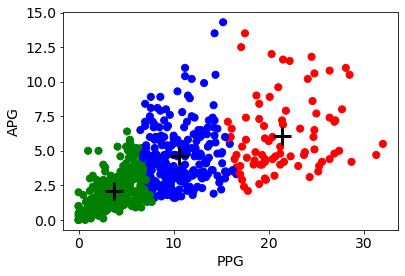

In [397]:
"""In the following chart, we can see that the clusters are mostly divided by PPG and RPG.
This could be in part from not scaling the data before clustering"""
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
colors = np.array(['red', 'green', 'blue', 'yellow'])
plt.scatter(fant_data_pos.PPG, fant_data_pos.RPG, c=colors[fant_data_pos.cluster], s=50);

plt.scatter(centers.PPG, centers.RPG, linewidths=3, marker='+', s=300, c='black');

plt.xlabel('PPG')
plt.ylabel('APG')

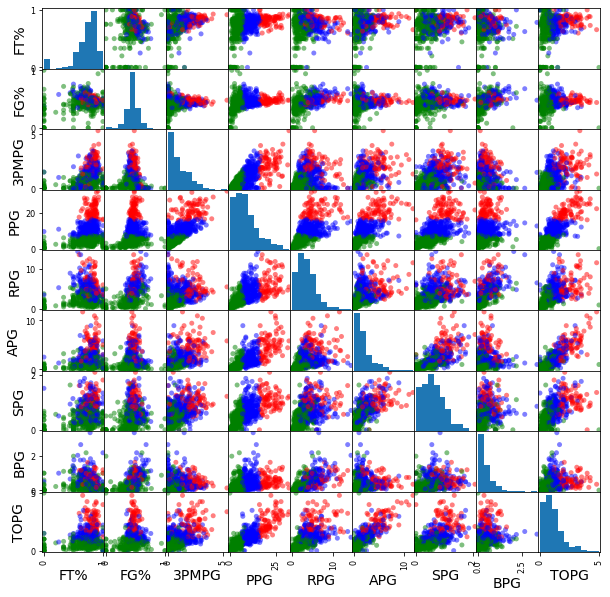

In [398]:
pd.plotting.scatter_matrix(X, c=colors[fant_data_pos.cluster], figsize=(10,10), s=100);

In [399]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2)
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=1)

In [400]:
X_scaled

array([[-0.97199274,  0.83434162, -1.08767047, ..., -0.70481104,
         0.11295275, -0.45520442],
       [-3.34523075, -2.72216129, -1.08767047, ..., -1.53090956,
        -0.99752435, -1.29532816],
       [-1.27505849,  1.42709211, -1.08767047, ...,  0.79718627,
         0.59576888,  0.33691224],
       ...,
       [ 0.78578866, -0.01244478,  1.32878726, ...,  0.57188668,
        -0.58713064,  3.67340365],
       [-0.01616996,  1.0036989 , -0.99817204, ..., -0.1290454 ,
        -0.15259612, -0.02314079],
       [ 0.3335213 ,  1.76580667, -1.07648317, ..., -0.70481104,
         1.07858502,  0.06087159]])

In [401]:
fant_data_scaled = fant_data_pos
km.labels_
fant_data_scaled['cluster'] = km.labels_
fant_data_scaled.sort_values('cluster')
km.cluster_centers_
centers = fant_data_scaled.groupby('cluster').mean()
centers

<ipython-input-401-1e8beb384401>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fant_data_scaled['cluster'] = km.labels_


,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG
cluster,,,,,,,,,
0,0.643973,0.391111,0.469579,3.554789,1.770881,0.800383,0.304904,0.189885,0.514444
1,0.751086,0.482143,1.079211,9.751504,4.641729,1.850000,0.720789,0.601842,1.100038
2,0.820899,0.464949,2.010000,19.541414,5.563636,5.244444,1.126465,0.495152,2.512626


In [402]:
fant_data_scaled.value_counts('cluster')

cluster
1    266
0    261
2     99
dtype: int64

In [403]:
#fant_data_scaled
fant_data_scaled.loc[fant_data_scaled['cluster'] == 3]

,FULL_NAME,POS,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster


In [404]:
db = DBSCAN(eps=1, min_samples=3, algorithm = 'auto')
db.fit(X_scaled)
db.labels_
fant_data_scaleddb = fant_data
fant_data_scaleddb['cluster'] = db.labels_
fant_data_scaleddb.sort_values('cluster')
fant_data_scaleddb.sample(10)
groups = fant_data_scaleddb.groupby('cluster').mean()
fant_data_scaleddb.value_counts('cluster')

<ipython-input-404-d70a1a17ba80>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fant_data_scaleddb['cluster'] = db.labels_


cluster
 0    310
-1    263
 1     19
 4     15
 3      4
 8      3
 7      3
 6      3
 5      3
 2      3
dtype: int64

In [405]:
fant_data_scaleddb

,FULL_NAME,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster
0,Precious Achiuwa,0.509,0.54,0.00,5.0,3.4,0.5,0.33,0.46,0.70,0
1,Jaylen Adams,0.000,0.12,0.00,0.3,0.4,0.3,0.00,0.00,0.00,1
2,Steven Adams,0.444,0.61,0.00,7.6,8.9,1.9,0.93,0.66,1.36,-1
3,Bam Adebayo,0.799,0.57,0.03,18.7,9.0,5.4,1.17,1.03,2.64,-1
4,LaMarcus Aldridge,0.838,0.46,1.29,13.7,4.5,1.7,0.38,0.86,0.95,-1
5,LaMarcus Aldridge,1.000,0.52,0.80,12.8,4.8,2.6,0.60,2.20,1.40,-1
6,Ty-Shon Alexander,0.500,0.25,0.13,0.6,0.7,0.4,0.00,0.07,0.20,0
7,Nickeil Alexander-Walker,0.727,0.42,1.65,11.0,3.1,2.2,1.02,0.48,1.50,0
8,Grayson Allen,0.868,0.42,2.14,10.6,3.2,2.2,0.92,0.16,0.96,0
9,Jarrett Allen,0.754,0.68,0.00,11.2,10.4,1.7,0.58,1.58,1.83,2


In [406]:
fant_data_scaleddb.loc[fant_data_scaleddb['cluster'] == 0]

,FULL_NAME,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster
0,Precious Achiuwa,0.509,0.54,0.00,5.0,3.4,0.5,0.33,0.46,0.70,0
6,Ty-Shon Alexander,0.500,0.25,0.13,0.6,0.7,0.4,0.00,0.07,0.20,0
7,Nickeil Alexander-Walker,0.727,0.42,1.65,11.0,3.1,2.2,1.02,0.48,1.50,0
8,Grayson Allen,0.868,0.42,2.14,10.6,3.2,2.2,0.92,0.16,0.96,0
11,Al-Farouq Aminu,0.824,0.40,0.41,5.5,5.4,1.7,1.00,0.53,1.47,0
12,Al-Farouq Aminu,0.800,0.20,0.17,1.5,3.2,0.3,0.33,0.00,0.50,0
16,Thanasis Antetokounmpo,0.510,0.49,0.12,2.9,2.2,0.8,0.39,0.18,0.75,0
17,Carmelo Anthony,0.891,0.42,1.93,13.4,3.1,1.5,0.67,0.55,0.88,0
20,Ryan Arcidiacono,0.650,0.42,0.57,3.1,1.5,1.3,0.20,0.00,0.23,0
21,Trevor Ariza,0.773,0.41,1.67,9.4,4.8,1.8,1.00,0.60,0.70,0


In [407]:
#groups.sort_values('FT%')
#groups.sort_values('FG%')
#groups.sort_values('3PMPG')
#groups.sort_values('PPG')
#groups.sort_values('RPG')
#groups.sort_values('APG')
#groups.sort_values('SPG')
#groups.sort_values('BPG')
#groups.sort_values('TOPG')


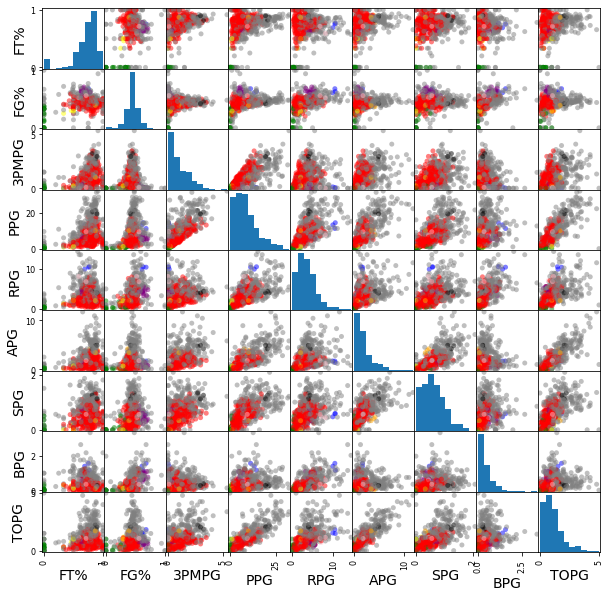

In [408]:
colorsdb = np.array(['red', 'green', 'blue', 'yellow','purple','pink','brown','black','orange','gray'])
pd.plotting.scatter_matrix(X, c=colorsdb[fant_data_scaleddb.cluster], figsize=(10,10), s=100);

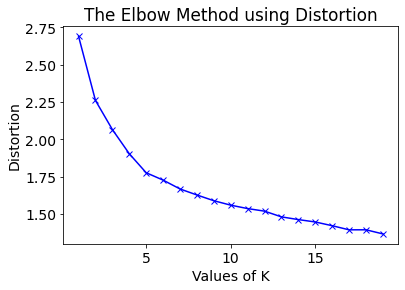

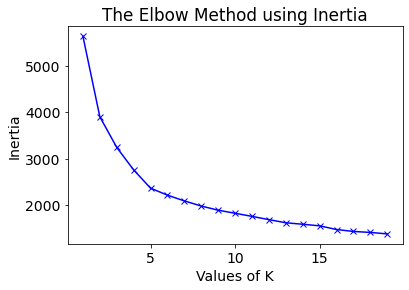

In [409]:
from sklearn import metrics 
from scipy.spatial.distance import cdist

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)     
      
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [410]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2)
km = KMeans(n_clusters=5, random_state=1)
km.fit(X_scaled)
X_scaled
fant_data_scaled = fant_data_pos
km.labels_
fant_data_scaled['cluster'] = km.labels_
fant_data_scaled.sort_values('cluster')
km.cluster_centers_
centers = fant_data_scaled.groupby('cluster').mean()
centers

<ipython-input-410-53bf5933734d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fant_data_scaled['cluster'] = km.labels_


,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG
cluster,,,,,,,,,
0,0.755762,0.424026,0.548528,4.254545,2.053680,0.909524,0.354719,0.191732,0.536710
1,0.817184,0.470000,2.067105,21.015789,5.965789,5.638158,1.158947,0.528026,2.705263
2,0.145696,0.248043,0.156957,1.343478,1.104348,0.493478,0.149783,0.183261,0.483043
3,0.671000,0.576145,0.362892,9.419277,6.465060,1.239759,0.568554,1.110602,1.050602
4,0.789753,0.439263,1.513000,10.698421,3.855263,2.400000,0.835421,0.387579,1.245421


In [411]:
fant_data_scaled.value_counts('cluster')

cluster
0    231
4    190
3     83
1     76
2     46
dtype: int64

In [412]:
#fant_data_scaled
fant_data_scaled.loc[fant_data_scaled['cluster'] == 3]

,FULL_NAME,POS,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster
2,Steven Adams,C,0.444,0.61,0.00,7.6,8.9,1.9,0.93,0.66,1.36,3
5,LaMarcus Aldridge,C-F,1.000,0.52,0.80,12.8,4.8,2.6,0.60,2.20,1.40,3
9,Jarrett Allen,C,0.754,0.68,0.00,11.2,10.4,1.7,0.58,1.58,1.83,3
10,Jarrett Allen,C,0.690,0.61,0.12,13.2,9.9,1.7,0.47,1.41,1.53,3
25,Deandre Ayton,C,0.769,0.63,0.06,14.4,10.5,1.4,0.59,1.17,1.48,3
28,Marvin Bagley III,F,0.575,0.50,0.86,14.1,7.4,1.0,0.49,0.49,1.37,3
31,Mo Bamba,C,0.682,0.47,0.83,8.0,5.8,0.8,0.30,1.26,0.80,3
51,Khem Birch,C,0.636,0.56,0.47,11.9,7.5,1.9,0.89,1.16,1.11,3
52,Goga Bitadze,C-F,0.738,0.43,0.44,5.1,3.3,0.8,0.20,1.33,0.38,3
53,Bismack Biyombo,C,0.448,0.59,0.00,5.0,5.3,1.2,0.26,1.12,1.08,3


In [413]:
good_players = fant_data_scaled.loc[fant_data_scaled['cluster'] == 1]
good_players

,FULL_NAME,POS,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster
3,Bam Adebayo,C-F,0.799,0.57,0.03,18.7,9.0,5.4,1.17,1.03,2.64,1
14,Giannis Antetokounmpo,F,0.685,0.57,1.10,28.1,11.0,5.9,1.18,1.21,3.39,1
29,LaMelo Ball,G,0.758,0.44,1.80,15.7,5.9,6.1,1.59,0.35,2.84,1
30,Lonzo Ball,G,0.781,0.41,3.13,14.6,4.8,5.7,1.49,0.56,2.24,1
41,Bradley Beal,G,0.889,0.48,2.17,31.3,4.7,4.4,1.15,0.37,3.12,1
64,Devin Booker,G,0.867,0.48,1.88,25.6,4.2,4.3,0.79,0.24,3.09,1
79,Malcolm Brogdon,G,0.864,0.45,2.59,21.2,5.3,5.9,0.88,0.27,2.05,1
86,Jaylen Brown,G-F,0.764,0.48,2.81,24.7,6.0,3.4,1.24,0.55,2.72,1
90,Elijah Bryant,G,1.000,0.46,1.00,16.0,6.0,3.0,0.00,1.00,4.00,1
95,Jimmy Butler,F,0.863,0.50,0.48,21.5,6.9,7.1,2.08,0.35,2.10,1


In [414]:
X_pre = good_players.drop('FULL_NAME',axis=1)
X_post = X_pre.drop('POS',axis=1)
Xg_scaled = scaler.fit_transform(X_post)
km = KMeans(n_clusters=3, random_state=1)
km.fit(Xg_scaled)
km.labels_
good_players['new_cluster'] = km.labels_
good_players.sort_values('new_cluster')
km.cluster_centers_
centers = good_players.groupby('new_cluster').mean()
centers

<ipython-input-414-6cefe4ef9660>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_players['new_cluster'] = km.labels_


,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster
new_cluster,,,,,,,,,,
0,0.801667,0.526667,1.235333,22.200000,9.566667,4.713333,1.042667,0.896000,2.877333,1
1,0.842056,0.472222,2.795556,26.066667,6.188889,6.844444,1.018333,0.443333,3.407222,1
2,0.812186,0.449302,2.052326,18.488372,4.616279,5.455814,1.258372,0.435116,2.351395,1


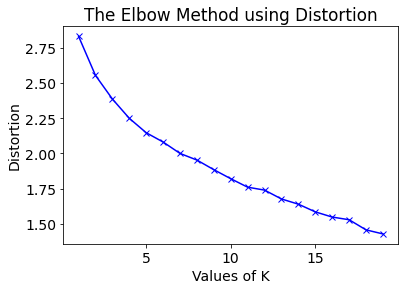

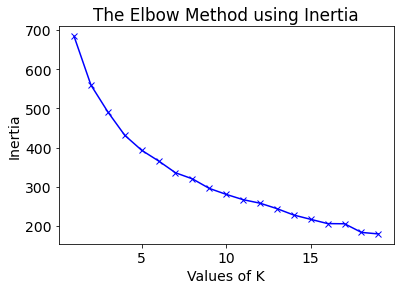

In [415]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Xg_scaled)     
      
    distortions.append(sum(np.min(cdist(Xg_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Xg_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(Xg_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / Xg_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [416]:
X_pre = good_players.drop('FULL_NAME',axis=1)
X_post = X_pre.drop('POS',axis=1)
Xg_scaled = scaler.fit_transform(X_post)
km = KMeans(n_clusters=5, random_state=1)
km.fit(Xg_scaled)
km.labels_
good_players['new_cluster'] = km.labels_
good_players.sort_values('new_cluster')
#km.cluster_centers_
#centers = good_players.groupby('new_cluster').mean()
#good_players

<ipython-input-416-4df793c000e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_players['new_cluster'] = km.labels_


,FULL_NAME,POS,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster,new_cluster
623,Trae Young,G,0.886,0.44,2.16,25.3,3.9,9.4,0.84,0.17,4.14,1,0
151,Luka Doncic,F-G,0.730,0.48,2.91,27.7,8.0,8.6,0.97,0.55,4.26,1,0
599,Russell Westbrook,G,0.656,0.44,1.32,22.2,11.5,11.7,1.35,0.35,4.80,1,0
230,James Harden,G,0.856,0.47,2.67,24.6,8.6,10.9,1.28,0.75,3.97,1,0
229,James Harden,G,0.883,0.44,3.12,24.8,5.1,10.4,0.88,0.75,4.25,1,0
290,LeBron James,F,0.698,0.51,2.31,25.0,7.7,7.8,1.07,0.56,3.73,1,0
348,Damian Lillard,G,0.927,0.45,4.10,28.7,4.2,7.5,0.93,0.25,3.03,1,1
241,Tobias Harris,F,0.892,0.51,1.32,19.5,6.8,3.5,0.89,0.82,1.73,1,1
280,Kyrie Irving,G,0.922,0.51,2.81,26.9,4.8,6.0,1.41,0.69,2.39,1,1
335,Zach LaVine,G-F,0.849,0.51,3.45,27.4,5.0,4.9,0.79,0.47,3.50,1,1


Text(0, 0.5, 'APG')

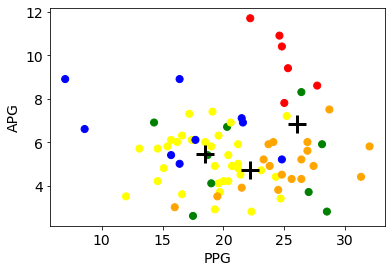

In [420]:
plt.rcParams['font.size'] = 14
colors = np.array(['red', 'orange', 'yellow', 'green','blue'])
plt.scatter(good_players.PPG, good_players.APG, c=colors[good_players.new_cluster], s=50);

plt.scatter(centers.PPG, centers.APG, linewidths=3, marker='+', s=300, c='black');

plt.xlabel('PPG')
plt.ylabel('APG')

In [383]:
km.cluster_centers_
centers = good_players.groupby('new_cluster').mean()
centers

,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster
new_cluster,,,,,,,,,,
0,0.784833,0.463333,2.415000,24.933333,7.466667,9.800000,1.065000,0.521667,4.191667,1
1,0.876556,0.481667,2.663889,25.155556,6.694444,4.927778,0.896111,0.583889,2.893333,1
2,0.802971,0.437647,2.314118,18.979412,4.426471,5.132353,1.165000,0.422353,2.434412,1
3,0.743889,0.550000,0.712222,22.200000,9.955556,5.155556,1.272222,0.864444,3.028889,1
4,0.847000,0.493333,1.063333,16.633333,5.333333,6.677778,1.611111,0.483333,2.037778,1


In [384]:
tall_players = fant_data_scaled.loc[fant_data_scaled['cluster'] == 3]
X_pre = tall_players.drop('FULL_NAME',axis=1)
X_post = X_pre.drop('POS',axis=1)
Xt_scaled = scaler.fit_transform(X_post)
km = KMeans(n_clusters=4, random_state=1)
km.fit(Xt_scaled)
km.labels_
tall_players['new_cluster'] = km.labels_
tall_players.sort_values('new_cluster')
km.cluster_centers_
centers = tall_players.groupby('new_cluster').mean()
centers

<ipython-input-384-dce4608ecb5e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tall_players['new_cluster'] = km.labels_


,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster
new_cluster,,,,,,,,,,
0,0.653450,0.606000,0.105500,11.305000,9.430000,1.815000,0.667500,1.256500,1.478500,3
1,0.659367,0.635333,0.022667,6.703333,5.250000,0.750000,0.493333,0.968000,0.788333,3
2,0.647417,0.507083,0.602917,8.683333,5.337500,1.250000,0.510833,0.929583,0.899167,3
3,0.811667,0.496667,1.428889,16.244444,6.933333,1.566667,0.753333,1.744444,1.377778,3


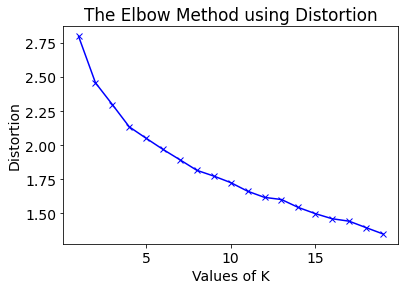

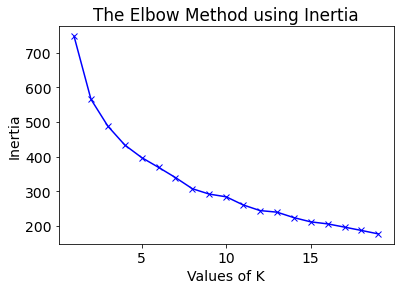

In [385]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Xt_scaled)     
      
    distortions.append(sum(np.min(cdist(Xt_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Xt_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(Xt_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / Xt_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [386]:
tall_players.sort_values('new_cluster')

,FULL_NAME,POS,FT%,FG%,3PMPG,PPG,RPG,APG,SPG,BPG,TOPG,cluster,new_cluster
2,Steven Adams,C,0.444,0.61,0.00,7.6,8.9,1.9,0.93,0.66,1.36,3,0
605,Robert Williams III,C-F,0.616,0.72,0.00,8.0,6.9,1.8,0.83,1.77,1.00,3,0
574,Jonas Valanciunas,C,0.773,0.59,0.34,17.1,12.5,1.8,0.56,0.92,1.61,3,0
465,Jakob Poeltl,C,0.508,0.62,0.00,8.6,7.9,1.9,0.68,1.78,1.22,3,0
464,Mason Plumlee,F-C,0.669,0.62,0.00,10.4,9.3,3.6,0.77,0.89,1.88,3,0
428,Jusuf Nurkic,C,0.619,0.51,0.32,11.5,9.0,3.4,1.03,1.08,1.97,3,0
318,Enes Kanter,C,0.774,0.60,0.01,11.2,11.0,1.2,0.46,0.67,1.08,3,0
312,DeAndre Jordan,C,0.500,0.76,0.00,7.5,7.5,1.6,0.30,1.14,1.49,3,0
268,Dwight Howard,C-F,0.576,0.59,0.07,7.0,8.4,0.9,0.43,0.90,1.62,3,0
243,Isaiah Hartenstein,C-F,0.686,0.58,0.12,8.3,6.0,2.5,0.50,1.19,1.44,3,0


In [ ]:
plt.rcParams['font.size'] = 14
colors = np.array(['red', 'green', 'blue', 'yellow','orange'])
plt.scatter(fant_data_pos.PPG, fant_data_pos.APG, c=colors[fant_data_pos.cluster], s=50);

plt.scatter(centers.PPG, centers.APG, linewidths=3, marker='+', s=300, c='black');

plt.xlabel('PPG')
plt.ylabel('APG')